In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
delinq = pd.read_csv('cs-training.csv', index_col = 'Unnamed: 0')
delinq.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [3]:
delinq[delinq['age'] == 49]['SeriousDlqin2yrs'].sum()

313

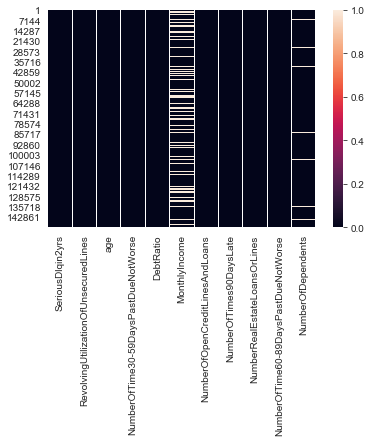

In [4]:
sns.heatmap(delinq.isnull())

In [5]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(delinq, test_size=0.18, random_state=42)
train, valid = train_test_split(train, test_size=0.20, random_state=42)  #splitted data into train, validation, test set

In [6]:
train.shape, valid.shape, test.shape

((98400, 11), (24600, 11), (27000, 11))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98400 entries, 106470 to 74056
Data columns (total 11 columns):
SeriousDlqin2yrs                        98400 non-null int64
RevolvingUtilizationOfUnsecuredLines    98400 non-null float64
age                                     98400 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    98400 non-null int64
DebtRatio                               98400 non-null float64
MonthlyIncome                           79026 non-null float64
NumberOfOpenCreditLinesAndLoans         98400 non-null int64
NumberOfTimes90DaysLate                 98400 non-null int64
NumberRealEstateLoansOrLines            98400 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    98400 non-null int64
NumberOfDependents                      95856 non-null float64
dtypes: float64(4), int64(7)
memory usage: 9.0 MB


In [8]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,98400.000000,98400.000000,98400.000000,98400.000000,98400.000000,7.902600e+04,98400.000000,98400.000000,98400.000000,98400.000000,95856.000000
mean,0.066697,6.040442,52.300579,0.425061,352.392690,6.697866e+03,8.462947,0.268669,1.020376,0.242561,0.759337
std,0.249498,264.019446,14.757539,4.223462,2070.894083,1.656280e+04,5.151420,4.200167,1.129570,4.185600,1.117410
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029919,41.000000,0.000000,0.175669,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155644,52.000000,0.000000,0.367473,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.558369,63.000000,0.000000,0.863598,8.241000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,10.000000


In [9]:
#sns.pairplot(train)

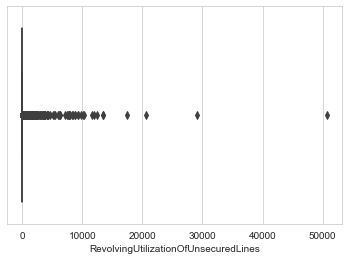

In [10]:
sns.boxplot(train['RevolvingUtilizationOfUnsecuredLines'])  #data contains outliers,
                                                            #the 'RevolvingUtilizationOfUnsecuredLines for example

In [11]:
valid.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,24600.000000,24600.000000,24600.000000,24600.000000,24600.000000,19678.000000,24600.000000,24600.000000,24600.000000,24600.000000,23931.000000
mean,0.069268,4.827802,52.238374,0.403984,343.904741,6601.684572,8.434878,0.248862,1.014837,0.223537,0.751494
std,0.253915,184.878956,14.768245,3.993904,1171.800683,6897.503057,5.105958,3.967665,1.135260,3.954155,1.109416
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030161,41.000000,0.000000,0.174968,3402.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.149722,52.000000,0.000000,0.365187,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559498,63.000000,0.000000,0.881509,8317.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,22198.000000,109.000000,98.000000,49112.000000,408333.000000,56.000000,98.000000,25.000000,98.000000,13.000000


In [12]:
train['MonthlyIncome'].quantile(0.99)

25000.0

In [13]:
train = train.drop(train[train['MonthlyIncome'] > 25000].index)   #dropped rows with
train.shape                                                       #value greater than the 99th percentil

(97641, 11)

In [14]:
train['NumberRealEstateLoansOrLines'].quantile(0.99)

4.0

In [15]:
train = train.drop(train[train['NumberRealEstateLoansOrLines'] > 3].index)   #dropped rows with
train.shape                                                                  #value greater than the 99th percentile

(95336, 11)

In [16]:
train['NumberOfDependents'].quantile(0.99)

4.0

In [17]:
train = train.drop(train[train['NumberOfDependents'] > 4].index)
train.shape

(94717, 11)

In [18]:
train.shape

(94717, 11)

In [19]:
def getoutliers(a, df):                                         #returns rows outside the lower and upper limit, 
    q1 = a.quantile(0.25) - a.min()                             #that is, the suspected outliers             
    q3 = a.quantile(0.75) - a.quantile(0.50) 
    iqr = a.quantile(0.75) - a.quantile(0.25) 
    lower_limit = q1 - (1.5 *iqr)
    upper_limit = q3 + (1.5*iqr)
    a = df[(a < lower_limit) | (a > upper_limit)]
    return a

In [20]:
outlier_df = getoutliers(train['RevolvingUtilizationOfUnsecuredLines'], train)  #dropped the rows with 
train = train.drop(outlier_df.index)                                            #the outliers
train.shape

(94065, 11)

In [21]:
train['NumberOfDependents'] = train['NumberOfDependents'].astype('Int64') #converted float to integer

In [22]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,94065.000000,94065.000000,94065.000000,94065.000000,94065.000000,75232.000000,94065.000000,94065.000000,94065.000000,94065.000000,91572.000000
mean,0.063509,0.315874,52.371690,0.423484,331.274870,6041.585974,8.309286,0.270079,0.916675,0.245437,0.717708
std,0.243878,0.348707,14.890616,4.291851,1729.957913,3855.973591,5.028653,4.268065,0.872013,4.255492,1.044712
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029137,41.000000,0.000000,0.173103,3333.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.151038,52.000000,0.000000,0.362483,5243.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.547956,63.000000,0.000000,0.857619,8000.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.204861,109.000000,98.000000,326442.000000,25000.000000,57.000000,98.000000,3.000000,98.000000,4.000000


In [23]:
train.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
106470,0,0.047867,68,0,64.000000,NaN,6,0,0,0,0
30034,0,0.114713,40,5,0.449105,6650.0,4,5,1,1,2


In [24]:
train = train.drop(train[train['MonthlyIncome'].isnull()].index)  #dropped MonthlyIncome Nulls  

valid = valid.drop(valid[valid['MonthlyIncome'].isnull()].index)

test = test.drop(test[test['MonthlyIncome'].isnull()].index)

In [25]:
train.shape

(75232, 11)

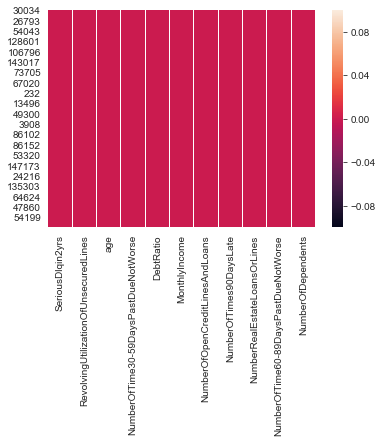

In [26]:
sns.heatmap(train.isnull())

In [27]:
train = train.drop(train[train['NumberOfDependents'].isnull()].index)  #dropped NumberOfDependents Nulls

valid = valid.drop(train[train['NumberOfDependents'].isnull()].index)

test = test.drop(test[test['NumberOfDependents'].isnull()].index)

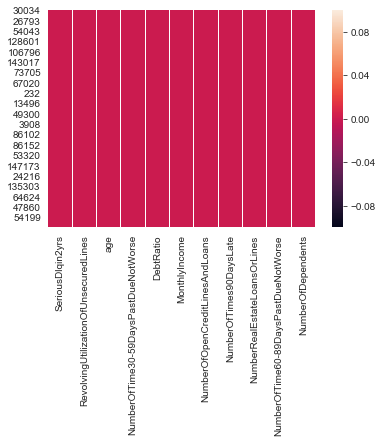

In [28]:
sns.heatmap(train.isnull())

In [29]:
train_y = train['SeriousDlqin2yrs']
train_X = train.drop('SeriousDlqin2yrs', axis = 1)

valid_y = valid['SeriousDlqin2yrs']
valid_X = valid.drop('SeriousDlqin2yrs', axis = 1)

test_y = test['SeriousDlqin2yrs']
test_X = test.drop('SeriousDlqin2yrs', axis = 1)


In [30]:
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [31]:
pipeline = make_pipeline(PolynomialFeatures(degree = 4),
                         StandardScaler(),
                         PCA(n_components = 5),
                         SMOTE(random_state = 42),
                         XGBClassifier(n_jobs = -1, n_estimators = 200, learning_rate = 0.1, colsample_bylevel =0.8,
                         colsample_bytree = 0.8))

In [32]:
from sklearn.model_selection import cross_val_score, KFold

In [33]:
folds = KFold(n_splits=5, shuffle= True, random_state= 0)

In [34]:
#cross_val_score(pipeline, train_X, train_y, scoring= 'recall',cv = folds,verbose= True, n_jobs= -1).mean()

In [35]:
pipeline.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('smote',
                 SMOTE(k_neighbors=5...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.8, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=-1, nthread=None,
   

In [36]:
prediction = pipeline.predict(valid_X)
#prediction = pipeline.predict(test_X)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(valid_y,prediction))
#print(classification_report(test_y,prediction))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85     18251
           1       0.19      0.74      0.30      1427

    accuracy                           0.75     19678
   macro avg       0.58      0.75      0.58     19678
weighted avg       0.92      0.75      0.81     19678



In [39]:
print(confusion_matrix(valid_y,prediction))
#print(confusion_matrix(test_y,prediction))

[[13737  4514]
 [  373  1054]]
